In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.special import erf

import numpy as np
randn = np.random.randn

In [10]:
def make_cdf(data, ax=None):
    data_sort = np.sort(data)
    y = np.arange(len(data_sort)) / len(data_sort)
    ax.plot(data_sort, y)

(0, 0.1)

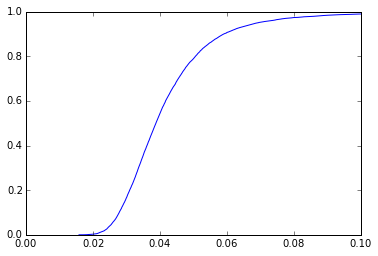

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

a = 10 + randn(10000) * 2
b = 8 + randn(10000) * 2
c = 11 + randn(10000) * 2

total = 2*a**-2 + 0.5*b**-2 + c**-2

make_cdf(total, ax=ax)
ax.set_xlim([0, 0.1])

(0, 0.1)

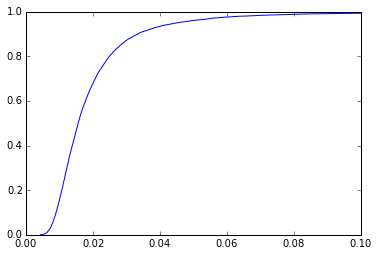

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

boo = (8 + randn(10000) * 2) ** -2

make_cdf(boo, ax=ax)
ax.set_xlim([0, 0.1])

(0, 0.1)

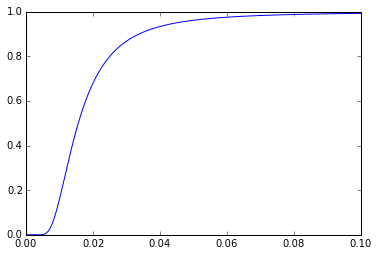

In [28]:
def test_cdf(x, w=1, mu=10, sig=2):
    return 0.5 * (1 + erf((np.sqrt(w/x) - mu)/(sig*np.sqrt(2))))


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = np.linspace(0.00001, 0.1, 1000)
y = 1 - test_cdf(x, mu=8, sig=2)
ax.plot(x, y)

ax.set_xlim([0, 0.1])

(0, 0.2)

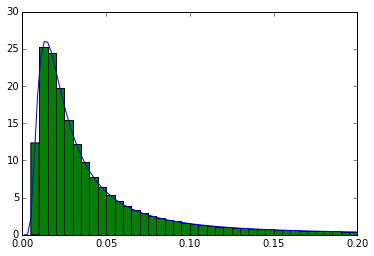

In [200]:
def test_pdf(x, mu=10, sig=2, w=1):
    top = w * np.exp(-(np.sqrt(w/x) - mu)**2/(2*sig**2))
    bot = 2*np.sqrt(2 * np.pi) * sig * x**2 * np.sqrt(w/x)
    
    return top/bot

def test_pdf2(x, mu=10, sig=2, w=1):
    top = np.sqrt(w) * np.exp(-(np.sqrt(w/x) - mu)**2/(2*sig**2))
    bot = 2*np.sqrt(2 * np.pi) * sig * x**1.5
    
    return top/bot

mu = 4
sig = 2
w = 0.5
max_val = 20

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = np.linspace(0.001, 0.2, 100)
y = test_pdf(x, mu=mu, sig=sig, w=w)
ax.plot(x, y)

bins = np.arange(0.005, max_val, 0.005)
var = w * (mu + randn(1000000) * sig) ** -2
ax.hist(var, bins, normed=True)

ax.set_xlim([0, 0.2])

In [88]:
2**7

128

(0, 0.1)

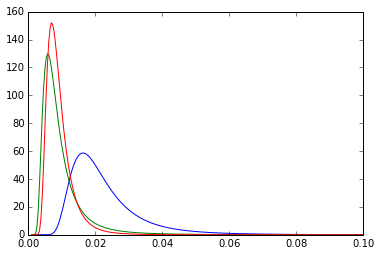

In [146]:
n = 2**9
x = np.linspace(0.001, 0.2, n)
rows = np.zeros((3, n))

rows[0,:] = test_pdf(x, mu=10, sig=2, w=2)
rows[1,:] = test_pdf(x, mu=8, sig=2, w=0.5)
rows[2,:] = test_pdf(x, mu=11, sig=2, w=1)
plt.plot(x, rows[0,:])
plt.plot(x, rows[1,:])
plt.plot(x, rows[2,:])

plt.xlim([0, 0.1])

(0, 0.1)

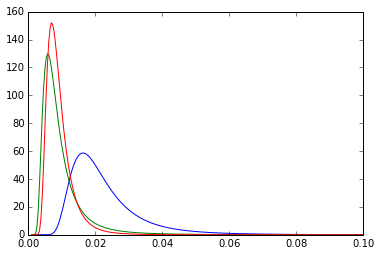

In [201]:
n = 2**9
x = np.linspace(0.001, 0.2, n)
rows = np.zeros((3, n))

rows[0,:] = test_pdf2(x, mu=10, sig=2, w=2)
rows[1,:] = test_pdf2(x, mu=8, sig=2, w=0.5)
rows[2,:] = test_pdf2(x, mu=11, sig=2, w=1)
plt.plot(x, rows[0,:])
plt.plot(x, rows[1,:])
plt.plot(x, rows[2,:])

plt.xlim([0, 0.1])

In [184]:
# padding = np.zeros([3, n//2])
# padded_rows = np.hstack([padding, rows, padding])

In [197]:
fft_of_rows = np.fft.rfft(rows, n=n*2)
fft_of_convolution = fft_of_rows.prod(axis=0)
convolution_not_normalised = np.fft.irfft(fft_of_convolution)
convolution = convolution_not_normalised[0:n] / np.trapz(convolution_not_normalised[0:n], x=x)

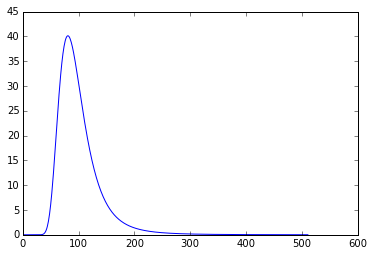

In [198]:
plt.plot(convolution)

(0, 0.2)

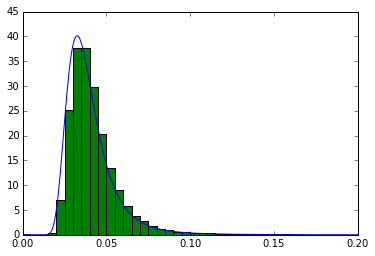

In [199]:
plt.plot(x, convolution)

a = 10 + randn(100000) * 2
b = 8 + randn(100000) * 2
c = 11 + randn(100000) * 2

total = 2*a**-2 + 0.5*b**-2 + c**-2

bins = np.arange(0.000000001, 100, 0.005)
plt.hist(total, bins, normed=True)
plt.xlim([0, 0.2])